<a href="https://colab.research.google.com/github/irfixq/Avocado_King/blob/main/Avocado_King.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado King - Avocado Price & Sales Prediction

## System Configuration

In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib # collection of functions for scientific and publication-ready visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns # visualizing distributions data
from scipy import stats # visualizing probability distribution of statistical function

import warnings # ignore warnings
warnings.filterwarnings('ignore')

from google.colab import data_table # to show full data table in multiple pages
%load_ext google.colab.data_table
pd.set_option('max_rows', 30000)

In [2]:
## Check system and python dependencies version
print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))


Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
NumPy version: 1.19.5
pandas version: 1.1.5
matplotlib version: 3.2.2


There are 2 options to get the data, either from GitHub or Google Drive.
In this case, I prefer to use Git Clone since it will be easier for user to access the repo instead of loading everything into their Google Drive or local.

In [3]:
## Clone repo from GitHub
! git clone 'https://github.com/irfixq/Avocado_King'

Cloning into 'Avocado_King'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 50 (delta 24), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [ ]:
## Mount Google Drive to get data
## make sure you uploaded the folder into your Google Drive first

#from google.colab import drive 
#drive.mount('/content/drive')

In [4]:
## get working directory
! pwd

## list all folders in working directory
! ls

/content
Avocado_King  sample_data


In [5]:
## change working directory to github folder
import os
os.chdir('/content/Avocado_King')


In [6]:
## check working directory after change path
! pwd
! ls

/content/Avocado_King
Avocado_King.ipynb     feature-explanations.xlsx  price-and-sales-data.csv
dfnew_price.csv        google-data.csv		  README.md
df_price_NA_check.csv  outliers.csv


## Data Pre-Processing

1. Data pre-processing for price and sales data
> * Read dataset  as pandas dataframe
> * Check for df dimension (rows, columns)
> * Check for column names and datatype
> * Show raw dataset table
> * Check for missing values
> * Handle missing values (if any)


2. Data Distribution
3. Data pre-processing for Google search data



#### Data pre-processing for price and sales data

In [7]:
## see the shape of the dataset (rows, columns)
df_price = pd.read_csv('/content/Avocado_King/price-and-sales-data.csv')
df_price.shape

(25161, 13)

In [8]:
## list all column names
df_price.columns

Index(['Date', 'AveragePrice', 'TotalVolume', '4046', '4225', '4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
## checking data type of each column
df_price.dtypes

Date             object
AveragePrice    float64
TotalVolume     float64
4046            float64
4225            float64
4770            float64
TotalBags       float64
SmallBags       float64
LargeBags       float64
XLargeBags      float64
type             object
year              int64
region           object
dtype: object

In [10]:
## see the dataset
df_price.head()

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,1/4/2015,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,1/4/2015,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,1/4/2015,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [11]:
## check for missing values in dataset
print(f"Missing data:{df_price.isna().sum(axis=0).any()}") # TRUE represents the dataset has missing data

Missing data:True


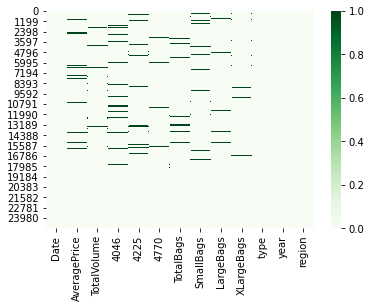

In [23]:
## see distribution of missing values in heat map
sns.heatmap(df_price.isna(),cmap='Greens')

Based on heatmap above, 
the dark marks represent missing values in our dataset. Column 'Date', 'type', 'year', 'region' does not have any missing values.

In [24]:
## See the missing data in dataset
df_price_NA_check = df_price.isna()
df_price_NA_check.head(10)

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,False,False,False


In [25]:
## Save as new .csv table to see whole data / for download
df_price_NA_check.to_csv('df_price_NA_check.csv',sep=',')

In [26]:
## there are 2 option to handle missing data
# option 1 = eliminate data point that contain missing values (not recommended as you might missed important data for other attribute)
# option 2 = substitue missing value with avg value of the attribute

dfnew_price = df_price.fillna(df_price.mean())
dfnew_price.head(10)

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1/4/2015,1.220000,40873.28,2819.50,28287.42,49.90,9716.460000,9186.93000,529.530000,0.00,conventional,2015,Albany
1,1/4/2015,1.000000,435021.49,364302.39,23821.16,82.15,46815.790000,16707.15000,30108.640000,0.00,conventional,2015,Atlanta
2,1/4/2015,1.396018,788025.06,53987.31,552906.04,39995.03,141136.680000,137146.07000,3990.610000,0.00,conventional,2015,BaltimoreWashington
3,1/4/2015,1.010000,80034.32,44562.12,24964.23,2752.35,7755.620000,6064.30000,1691.320000,0.00,conventional,2015,Boise
4,1/4/2015,1.020000,491738.00,7193.87,396752.18,128.82,87663.130000,87406.84000,256.290000,0.00,conventional,2015,Boston
5,1/4/2015,1.400000,116253.44,3267.97,55693.04,109.55,57182.880000,57182.88000,0.000000,0.00,conventional,2015,BuffaloRochester
6,1/4/2015,0.930000,5777334.90,2843648.26,2267755.26,137479.64,528451.740000,477193.38000,47882.560000,3375.80,conventional,2015,California
7,1/4/2015,1.190000,166006.29,29419.03,47220.75,38568.95,50797.560000,212419.88482,75899.237988,0.00,conventional,2015,Charlotte
8,1/4/2015,1.110000,783068.03,30270.26,550752.19,124506.10,77539.480000,72888.46000,4651.020000,0.00,conventional,2015,Chicago
9,1/4/2015,0.880000,228569.58,3274.30,168764.78,1447.06,295043.209471,17525.31000,37445.460000,112.67,conventional,2015,CincinnatiDayton


In [27]:
## check for dataset after impute missing values
print(f"Missing data:{dfnew_price.isna().sum(axis=0).any()}")  # FALSE represent there is no missing values anymore in the dataset

Missing data:False


In [28]:
## see new dataset after substitue missing values / for download
dfnew_price.to_csv('dfnew_price.csv',sep=',')

In [29]:
## Check for outliers
outliers = dfnew_price.describe()
outliers

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,25161.000000,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,2.516100e+04,25161.000000,25161.000000
mean,1.396018,9.170913e+05,2.981530e+05,2.958284e+05,2.246362e+04,2.950432e+05,2.124199e+05,7.589924e+04,4405.638467,2016.776877
std,0.377521,3.660879e+06,1.265327e+06,1.187469e+06,1.027392e+05,1.210964e+06,8.530163e+05,3.517944e+05,25357.440983,1.323978
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.120000,1.400096e+04,9.223600e+02,3.284480e+03,0.000000e+00,7.733600e+03,5.244730e+03,2.888900e+02,0.000000,2016.000000
50%,1.380000,1.363315e+05,1.225826e+04,3.093655e+04,2.520000e+02,5.105029e+04,3.537269e+04,4.757530e+03,0.000000,2017.000000
75%,1.620000,5.638524e+05,1.358825e+05,1.921057e+05,8.008860e+03,1.632409e+05,1.159123e+05,3.744130e+04,593.800000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,7.864297e+06,844929.830000,2019.000000


Based on above table, there is no outliers within the dataset because all mean values lie in between min and max values of the distribution.


In [30]:
## Save as new .csv file / for download
outliers.to_csv('outliers.csv',sep=',')

In [31]:
## Checking each features of the cleaned dataset
dfnew_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25161 entries, 0 to 25160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          25161 non-null  object 
 1   AveragePrice  25161 non-null  float64
 2   TotalVolume   25161 non-null  float64
 3   4046          25161 non-null  float64
 4   4225          25161 non-null  float64
 5   4770          25161 non-null  float64
 6   TotalBags     25161 non-null  float64
 7   SmallBags     25161 non-null  float64
 8   LargeBags     25161 non-null  float64
 9   XLargeBags    25161 non-null  float64
 10  type          25161 non-null  object 
 11  year          25161 non-null  int64  
 12  region        25161 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.5+ MB


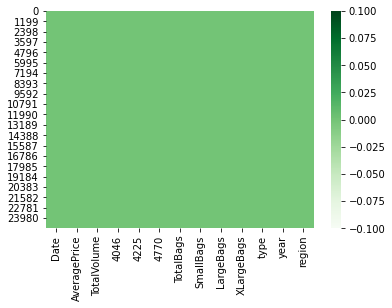

In [32]:
## see distribution of cleaned dataset in heat map
sns.heatmap(dfnew_price.isna(),cmap='Greens')

**Conclusion after data pre-processing**
* Features = 13
* Instances = 25,161
* No null values after imputing the missing values with mean of the attribute itself
* Features with datatype = 'object' could be the machine learning classifier which are; 'type' & 'region'

#### Data Distribution
https://seaborn.pydata.org/tutorial/distributions.html

To understand how the variables are distributed. 
Question that can be answered by cisualizing the distributions of data are:
What range do the observations cover? 
* What is their central tendency? 
* Are they heavily skewed in one direction? 
* Is there evidence for bimodality? 
* Are there significant outliers? 
* Do the answers to these questions vary across subsets defined by other variables?

##### Visualizing distribution of data

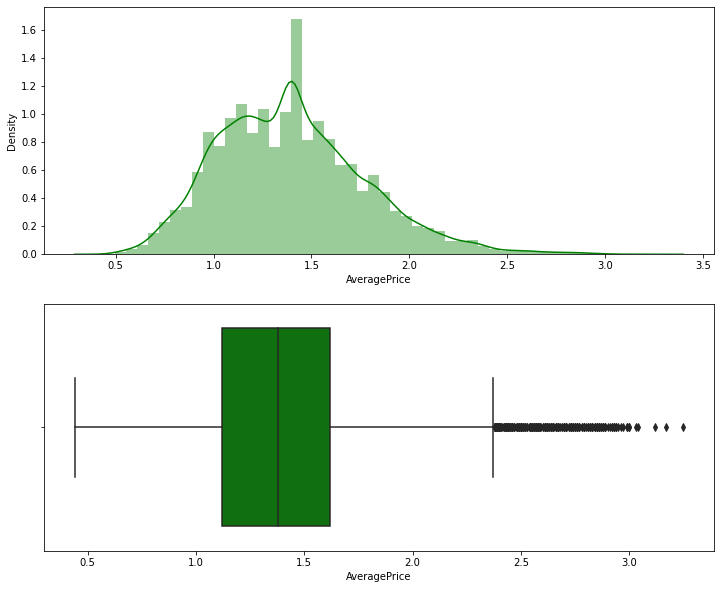

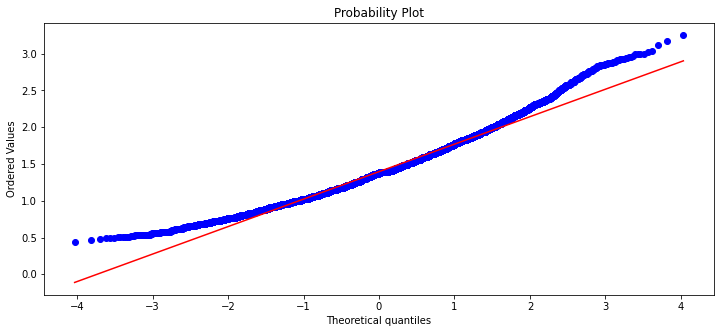

In [33]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))
# Univriate distribution plot
# by default the kernel density estimation is TRUE; to see continuous density by smoothing the observation using Gaussian kernel fx
sns.distplot(dfnew_price.AveragePrice, color='green', ax=ax[0])
# Box plot
sns.boxplot(dfnew_price.AveragePrice, color='green',ax=ax[1])

## see probability distribution of avg price
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
# Probability distribution
stats.probplot(dfnew_price['AveragePrice'], plot=ax)
plt.show()

**Conclusion from visualizing the data distribution**
* All 3 plots above showed bimodal distribution which telling us that we have 2 local maximum.
* As discussed earlier in pre-processing section, our potential classifier could be Type and Region which in this case Type has 2 class (Organic & Conventional)

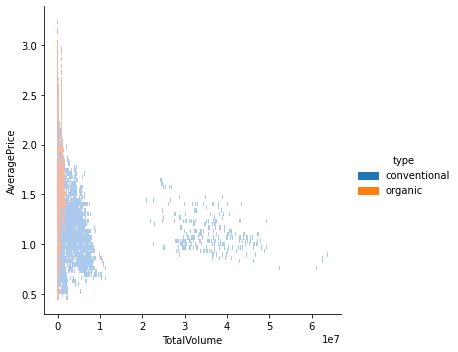

In [35]:
# Distribution plot of Avg price against total volume for each Avocade type (class: Organic & Conventional)
sns.displot(dfnew_price, x='TotalVolume', y='AveragePrice',hue='type',height=5)

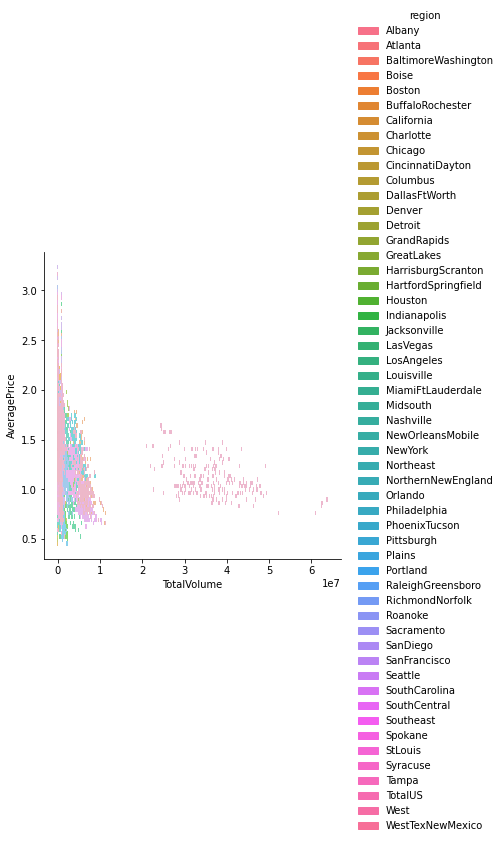

In [36]:
sns.displot(dfnew_price, x='TotalVolume', y='AveragePrice',hue='region',height=5)

**Conclusion from bivariate distribution plot**
* Based on the bivariate distribution plot above, we can see that more conventional avocado has been sold compared to organic avocado.
* Also, organic avocado was selling at higher price compared to conventional avocado.




##### Skewness
Measure of the asymmetry of the probability distribution of a random variable about its mean. In other words, skewness tells you the amount and direction of skew (departure from horizontal symmetry).

In [37]:
print("Skewness: %f" % dfnew_price['AveragePrice'].skew())

Skewness: 0.602213


* If skewness is 0, the data are perfectly symmetrical, although it is quite unlikely for real-world data.
* If skewness is less than -1 or greater than 1, the distribution is highly skewed.
***If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.**
* If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.